In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import scipy.stats as st
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Here the pandas DataFrame is named 'listings'

listings = pd.read_csv('beepi_prices.csv')

In [2]:
list(listings)

['Sale ID',
 ' Year',
 ' Make',
 ' Model',
 ' Style',
 ' Is Active?',
 ' On Sale?',
 ' Has Sold?',
 ' Offer to Seller',
 ' Private Price PI',
 ' Trade In Price PI',
 ' Retail Price PI',
 ' CPO Price PI',
 ' Private Price L',
 ' Trade In Price L',
 ' Retail Price L',
 ' CPO Price L',
 ' Beepi Price']

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
# Shows the first two rows the listings DataFrame

listings.head(1)

,Sale ID,Year,Make,Model,Style,Is Active?,On Sale?,Has Sold?,Offer to Seller,Private Price PI,Trade In Price PI,Retail Price PI,CPO Price PI,Private Price L,Trade In Price L,Retail Price L,CPO Price L,Beepi Price
0,1002,2012,Volkswagen,Touareg,TDI Sport 4dr SUV AWD w/Navigation Prod. End ...,N,N,N,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# There is an error when I attempt to select individual pandas Series (columns) of the original DataFrame
# I am converting each DataFrame column into a selectable pandas Series so no errors are given

col_name = listings.columns[0]
listings = listings.rename(columns = {col_name:'SaleID'})

col_name = listings.columns[1]
listings = listings.rename(columns = {col_name:'Year'})

col_name = listings.columns[2]
listings = listings.rename(columns = {col_name:'Make'})

col_name = listings.columns[3]
listings = listings.rename(columns = {col_name:'Model'})

col_name = listings.columns[4]
listings = listings.rename(columns = {col_name:'Style'})

col_name = listings.columns[5]
listings = listings.rename(columns = {col_name:'IsActive'})

col_name = listings.columns[6]
listings = listings.rename(columns = {col_name:'OnSale'})

col_name = listings.columns[7]
listings = listings.rename(columns = {col_name:'HasSold'})

col_name = listings.columns[8]
listings = listings.rename(columns = {col_name:'OfferToSeller'})

col_name = listings.columns[9]
listings = listings.rename(columns = {col_name:'PrivatePrice1'})

col_name = listings.columns[10]
listings = listings.rename(columns = {col_name:'TradeInPrice1'})

col_name = listings.columns[11]
listings = listings.rename(columns = {col_name:'RetailPrice1'})

col_name = listings.columns[12]
listings = listings.rename(columns = {col_name:'CPOPrice1'})

col_name = listings.columns[13]
listings = listings.rename(columns = {col_name:'PrivatePrice2'})

col_name = listings.columns[14]
listings = listings.rename(columns = {col_name:'TradeInPrice2'})

col_name = listings.columns[15]
listings = listings.rename(columns = {col_name:'RetailPrice2'})

col_name = listings.columns[16]
listings = listings.rename(columns = {col_name:'CPOPrice2'})

col_name = listings.columns[17]
listings = listings.rename(columns = {col_name:'listingsPrice'})

In [6]:
listings.head(1)

,SaleID,Year,Make,Model,Style,IsActive,OnSale,HasSold,OfferToSeller,PrivatePrice1,TradeInPrice1,RetailPrice1,CPOPrice1,PrivatePrice2,TradeInPrice2,RetailPrice2,CPOPrice2,listingsPrice
0,1002,2012,Volkswagen,Touareg,TDI Sport 4dr SUV AWD w/Navigation Prod. End ...,N,N,N,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# I am now reading in another DataFrame (cars) to the iPythonNB in order to gain access to attributes such as ZIP code for each listing 
# This CSV file had a common encoding format that needed to be specified in order to read it as a DataFrame ("ISO-8859-1")

cars = pd.read_csv('AllCars.csv', encoding = "ISO-8859-1")
cars.head(1)

,SaleID,UserID,StyleID,OriginalStyleID,Mileage,VIN,LoweredVIN,StatusID,StatusDate,Drop_CarAddress1,...,NumViews,MfgBrochureText,HasMfgBrochure,FirstListedForSale,LastListedForSale,SellerAcceptedListingDate,Seller30DayEmailStatus,RelistedAsNewDate,ParentSaleIdForTradeIn,PrivatePartyAddressId
0,25972,210914,200417706,200417706,38800,5NPEC4AB7DH659528,5npec4ab7dh659528,60,2016-01-04 22:19:58 +0000,127 West 64th Place,...,57,"The power of suggestion, raised to an art form",1,2016-01-04 00:40:58 +0000,2016-01-04 00:40:58 +0000,2016-01-03 00:00:00 +0000,0,<null>,<null>,48937


In [8]:
# Merging the listings and cars DataFrames into a new DataFrame: "data" 
# Full outer join is used to preserve all data points, including those which are incomplete or have missing values 

data = pd.merge(listings, cars, on='SaleID', how='outer')
data.head(1)

,SaleID,Year,Make,Model,Style,IsActive_x,OnSale,HasSold,OfferToSeller,PrivatePrice1,...,NumViews,MfgBrochureText,HasMfgBrochure,FirstListedForSale,LastListedForSale,SellerAcceptedListingDate,Seller30DayEmailStatus,RelistedAsNewDate,ParentSaleIdForTradeIn,PrivatePartyAddressId
0,1002,2012,Volkswagen,Touareg,TDI Sport 4dr SUV AWD w/Navigation Prod. End ...,N,N,N,N/A,NaN,...,<null>,<null>,0.0,<null>,<null>,<null>,2.0,<null>,<null>,35924.0


In [9]:
# Converting the 'NumViews' column from object type to integer type

data['NumViews'] = data['NumViews'].replace('<null>', np.nan)
data['NumViews'] = data['NumViews'].fillna(0)
data['NumViews'] = data['NumViews'].astype(int)

## Which vehicle models get the highest number of views?

In [10]:
# Examining vehicles listed, ordered by the total number of views 

num_views = data.sort_values('NumViews', ascending=False)
most_viewed = num_views[['Year','Make', 'Model', 'Style', 'NumViews']]

In [11]:
gross_views = most_viewed.groupby(['Make', 'Model']).sum().sort_values('NumViews',ascending=False).drop('Year', axis=1)
vehicle_count = most_viewed.groupby(['Make', 'Model']).count().sort_values('NumViews',ascending=False).drop('Year', axis=1)
relative_pop = (gross_views.NumViews / vehicle_count.NumViews).sort_values(ascending=False).head(20)

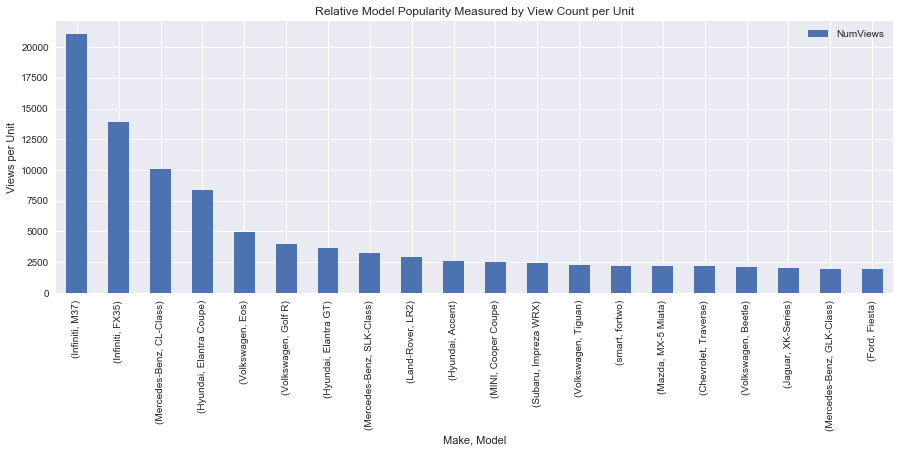

In [12]:
plt.figure(figsize=(15, 5))
relative_pop.plot(kind='bar')
plt.title('Relative Model Popularity Measured by View Count per Unit')
plt.xlabel('Make, Model')
plt.ylabel('Views per Unit')
plt.legend(loc='upper right')
plt.show()

## What were the number of sales over time?

In [13]:
# First, let's see how many total sales have occurred
# Had to use the str.strip function here to remove whitespace

data['HasSold'] = data['HasSold'].astype('str')
data['HasSold'] = data['HasSold'].str.strip()
sold = data[(data.HasSold == 'Y')]
sold.Make.value_counts().sum()

3511

In [14]:
dates = data.LastListedForSale.replace('<null>', np.nan).dropna()
new_dates1 = pd.to_datetime(pd.Series(dates))
just_date = new_dates1.dt.date
ts = pd.DataFrame(data=just_date)
ts.columns = ['Date']

In [20]:
ts.Date.value_counts()

2016-01-04    35
2015-12-22    35
2015-10-30    35
2016-01-06    34
2015-11-30    30
2015-10-21    30
2015-11-22    28
2015-09-24    28
2015-11-28    27
2015-08-14    27
2015-08-27    26
2015-08-07    26
2015-12-21    25
2015-08-20    25
2015-12-11    25
2015-08-03    24
2015-12-18    24
2015-05-28    24
2015-10-02    23
2015-09-18    23
2015-10-08    23
2015-07-30    22
2015-06-19    22
2015-09-08    22
2015-08-12    22
2015-12-31    21
2015-02-04    21
2016-01-07    21
2015-10-16    21
2015-12-15    21
              ..
2014-06-16     1
2014-06-19     1
2014-12-14     1
2014-05-20     1
2015-04-20     1
2014-07-24     1
2015-08-06     1
2014-03-03     1
2015-11-21     1
2015-05-25     1
2014-11-28     1
2015-05-04     1
2015-05-10     1
2014-06-26     1
2014-08-10     1
2014-06-11     1
2015-01-26     1
2014-10-07     1
2014-12-22     1
2014-12-17     1
2014-07-13     1
2015-12-12     1
2015-03-15     1
2015-05-01     1
2015-11-01     1
2015-10-31     1
2015-04-13     1
2015-09-27    

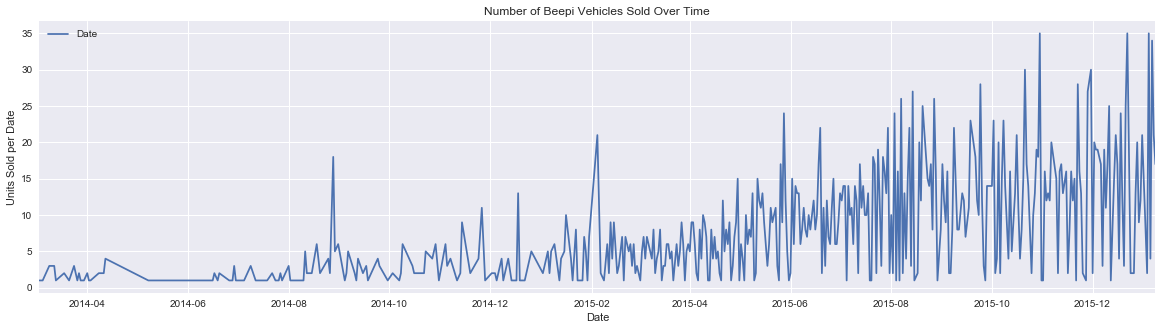

In [15]:
plt.figure(figsize=(20,5))
ts.Date.value_counts().plot()
plt.title('Number of Beepi Vehicles Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold per Date')
plt.legend(loc='upper left')
plt.show()

We can see many peaks in the sale data over time; this reflects changing transaction numbers over different days. Which days of the week had the highest/lowest number of transactions? We will answer this in the next section

## Which days had the highest number of sales? The lowest?

In [ ]:
import datetime

# First we need to create and isolate the dates 
dates1 = pd.to_datetime(ts.Date, format='%Y-%m-%d')

# We can now convert the dates into days of the week by name
days = dates1.dt.weekday_name
# We can also use the function 'dt.strftime(%A)' to obtain the same results

In [ ]:
days.value_counts().sum()

In [ ]:
days_df = days.to_frame()
days_df.Date.value_counts().plot(kind='bar')
plt.title('Number of Beepi Vehicles Sold By Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Units Sold')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Creating a new DataFrame for creating a Boxplot; we trying to discover number of transactions per day here

# Grouping by itself reveals the count of each transaction per date 
a = dates1.groupby(dates1).count()

# Converts Series 'a' to a DF
b = a.to_frame()

# Adds the column 'Count' 
b.columns = ['Count'] 

# Adds back a new index column 
c = b.reset_index()
d = c.Date.dt.weekday_name
c['Dayname'] = d

In [ ]:
# First we need to convert the data for each day of the week into a list 
sun = c[c.Dayname == 'Sunday'].Count.tolist()
mon = c[c.Dayname == 'Monday'].Count.tolist()
tue = c[c.Dayname == 'Tuesday'].Count.tolist()
wed = c[c.Dayname == 'Wednesday'].Count.tolist()
thu = c[c.Dayname == 'Thursday'].Count.tolist()
fri = c[c.Dayname == 'Friday'].Count.tolist()
sat = c[c.Dayname == 'Saturday'].Count.tolist()

# Aggregate the listed data 
data_to_plot = [sun, mon, tue, wed, thu, fri, sat]

# Generate the graph 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
bp = ax.boxplot(data_to_plot)

# General graph information 
plt.title('Box Plot: Sales By Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')

# Setting the x-label for each dataset 
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
# adds a grid to the plot 
# plt.grid()
plt.show()

## Which months had the highest number of sales? The lowest?

In [ ]:
# Adding the month to the dataframe 
f = c.Date.dt.month
c['Month'] = f

jan = c[c.Month == 1].Count.tolist()
feb = c[c.Month == 2].Count.tolist()
mar = c[c.Month == 3].Count.tolist()
apr = c[c.Month == 4].Count.tolist()
may = c[c.Month == 5].Count.tolist()
jun = c[c.Month == 6].Count.tolist()
jul = c[c.Month == 7].Count.tolist()
aug = c[c.Month == 8].Count.tolist()
sep = c[c.Month == 9].Count.tolist()
ocb = c[c.Month == 10].Count.tolist()
nov = c[c.Month == 11].Count.tolist()
dec = c[c.Month == 12].Count.tolist()

# Aggregate the listed data 
data_to_plott = [jan, feb, mar, apr, may, jun, jul, aug, sep, ocb, nov, dec]

# Generate the graph 
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
bp = ax.boxplot(data_to_plott)

# General graph information 
plt.title('Box Plot: Sales By Month')
plt.xlabel('Months of the Year')
plt.ylabel('Number of Sales')

# Setting the x-label for each dataset 
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                    'October', 'November', 'December'])
# adds a grid to the plot 
# plt.grid()
plt.show()

In [ ]:
# Create dataframe of month names
months = dates1.dropna().dt.strftime('%B')
months_df = months.to_frame()

# Create a mapping key to sort months from January to December 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']

# Plot the months in order
plt.figure(figsize=(10, 5))
months_df.Date.value_counts().reindex(months, fill_value=0).plot(kind='bar')
plt.title('Number of Beepi Vehicles Sold By Month')
plt.xlabel('Month')
plt.ylabel('Total Units per Month')
plt.legend(loc='upper left')
plt.show()

## Which models sold the quickest? 

In [ ]:
# Replace <null> values with NaN 
data['first_listed'] = data.FirstListedForSale.replace('<null>', np.nan)
data['last_listed'] = data.LastListedForSale.replace('<null>', np.nan)

# Create a new dataframe with these values 
time_to_sale = data[['SaleID', 'Year', 'Make','Model','Style', 'SalePrice', 'NumViews', 'first_listed', 'last_listed']]

# Create new columns first_listed, last_listed, and time_delta; add them to time_to_sale df  
time_to_sale['first_listed'] = pd.to_datetime(time_to_sale.first_listed, format='%Y-%m-%d')
time_to_sale['last_listed'] = pd.to_datetime(time_to_sale.last_listed, format='%Y-%m-%d')
time_to_sale['time_delta'] = time_to_sale.last_listed.dt.date - time_to_sale.first_listed.dt.date

# Find all vehicles that were sold 
new_time_to_sale = time_to_sale[time_to_sale.time_delta.notnull()]

# Drop vehicles which have the same first_listed and last_listed times 
new_time_to_sale = new_time_to_sale[new_time_to_sale['first_listed'] != new_time_to_sale['last_listed']]

In [ ]:
# Vehicles that sold in 14 days or less 
quick_sale = new_time_to_sale[new_time_to_sale.time_delta <= '14 days']
quick_sale = quick_sale.groupby(['Model','Year','Make']).count().reset_index()

# Year/Make/Model Count has to be greater than 3 to be included 
qs = quick_sale[quick_sale.SaleID >= 3].sort_values(by='Style', ascending=False)
qs = qs[['Year', 'Make', 'Model', 'Style']]
qs.rename(columns={'Style': 'Number_of_Sales'}, inplace=True)
qs

## Which make had the highest number of transactions? The lowest?

In [ ]:
# The total number of vehicles sold by Make 

sold.Make.value_counts().head(5)

In [ ]:
# A plot of all of the vehicles sold by make

plt.figure(figsize=(20,5))
sold.Make.value_counts().plot(kind='bar')
plt.title('Number of Beepi Vehicles Sold by Make')
plt.xlabel('Make')
plt.ylabel('Units Sold')
plt.legend(loc='upper right')
plt.show()

Honda was the make with the highest number of transactions; Lincoln had the lowest number of transactions

## What was the average price of all sold vehicles?

In [ ]:
# The initial datatype is an object; we will need to transform it to an integer datatype

sold.SalePrice.dtype

In [ ]:
# Converts sold SalePrice objects to integers 

# Takes the 'SalePrice' column and assigns it to the variable 'ssp'
ssp = sold.SalePrice

# Converts the SalePrice to integers; errors will be dealt with by converting them to NaNs 
ssp = pd.to_numeric(ssp, errors = 'coerce')

# Checks the datatype - it is float64! 
ssp.dtype

In [ ]:
# The mean price of all sold cars

ssp.mean()

## What was the average price of all unsold vehicles?

In [ ]:
# Gather all data regarding unsold vehicles into a new DataFrame

unsold = data[(data.HasSold == 'N')]
unsold.head(1)

In [ ]:
# Again, the initial datatype is an object; we will need to transform it to an integer datatype

unsold.SalePrice.dtype

In [ ]:
# Converts unsold SalePrice objects to integers 

usp = unsold.SalePrice

# Converts variable 'usp' from objects to integers
usp = pd.to_numeric(usp, errors = 'coerce')

# Verify the object change was correct 
usp.dtype

In [ ]:
# The mean price of all unsold cars

usp.mean()

## Is the difference between sold and unsold inventory statistically significant? 

To test the difference, we will be analyzing the variance using an unpaired T-test of the data. ANOVA will not be used since we are comparing the mean of 2 samples. 

$\mu_s$: the mean price of sold vehicles 

$\mu_u$: the mean price of unsold vehicles 

$H_0: \mu_s = \mu_u$ (there is no statistical difference between unsold and sold inventory in terms of price)

$H_A: \mu_s ≠ \mu_u$ (there is a statistical difference between prices of sold versus unsold inventory in terms of price)

In [ ]:
# Dropping all NaN values for each dataset; f_oneway function will not work with NaN values 

usp_n = usp.dropna()
ssp_n = ssp.dropna() 

# There is a large difference between sold/unsold population sizes 

display(usp_n.count()) 
display(ssp_n.count()) 

# Despite the difference in population sizes, we can use ANOVA rather than Kruskal-Wallis since data is parametric
fvalue, pvalue = st.f_oneway(ssp_n, usp_n)
display(fvalue, pvalue)

The F-Statistic is extremely high (~57.8) and the p-value is tiny, which indicates that the price difference between sold/unsold vehicles is statistically significant. We there reject the $ H_0 $ and accept the $ H_A $ that there is a statistical difference between the populations

From the results, we see that unsold units had a significantly higher price than sold units (Δ ≈ 3850 dollars). This shows that unsold inventory skews toward higher priced vehicles and exposes the company to more unwanted risk since more expensive vehicles tend to lose more value over time than less expensive vehicles. 

Confidence intervals were not calculated since we have the entire population of unsold/sold vehicles.

In [ ]:
st.ttest_ind(usp_n, ssp_n, equal_var=False)

In [ ]:
st.ttest_ind(usp_n, ssp_n, equal_var=True)

## Visualizations to show the dollar range where most transactions are occurring

In [ ]:
# A histogram of all unsold/sold vehicles by price 

# Drop NaNs from unsold/sold prices DFs
a = usp.dropna()
b = ssp.dropna()

# Create a larger figure to better appreciate the nuances offered from a histogram with a larger number of bins
plt.figure(figsize=(20,10))

# Convert the series to lists in order to overlay them onto a single histogram and label them 
plt.hist(a.tolist(), bins=100, alpha=0.5, label='unsold')
plt.hist(b.tolist(), bins=100, alpha=0.5, label='sold')

# Move the legend to the upper right 
plt.legend(loc='upper right')

# Label the histogram, x, and y axes 
plt.title('Prices of Unsold/Sold Beepi Vehicles')
plt.xlabel('Price of Vehicle in USD')
plt.ylabel('Number of Vehicles')
plt.show()

In [ ]:
# A kernel density estimation plot to help visualize the pricing data in another fashion
# We can see from the plots that the prices of both sold and unsold vehicles are clustered in the $15k - $25k area

plt.figure(figsize=(20,10))
a.plot.kde(label='unsold')
b.plot.kde(label='sold')
plt.legend(loc='upper right')
plt.title('Price Density of Beepi Vehicle Inventory')
plt.xlabel('Price of Vehicle in USD')
plt.ylabel('Relative Density')
plt.show()

In [ ]:
# A box plot to show the data in a different graphical perspective 
data_to_plot2 = [a.tolist(), b.tolist()]

# Generate the graph 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot2)

# General graph information 
plt.title('Box Plot: Unsold v. Sold Beepi Inventory')
plt.xlabel('Sale Status')
plt.ylabel('Price of Vehicle')

# Setting the x-label for each dataset 
ax.set_xticklabels(['Unsold Vehicles', 'Sold Vehicles'])
plt.show()

## Which brand had the highest overall gross profits? The lowest? 

In [ ]:
profits = sold[['Year','Make', 'Model', 'Style', 'OfferToSeller', 'SalePrice']]
profits.head(1)

In [ ]:
# We need to transform the Offer To Seller column from an object type to a integer type

profits.OfferToSeller.dtype
profits.SalePrice.dtype

In [ ]:
# Converts Offer To Seller & Sale Price to the integer type 

ots = pd.to_numeric(profits.OfferToSeller, errors='coerce')
sp = pd.to_numeric(profits.SalePrice, errors='coerce')

In [ ]:
# Errors were thrown when I used the following code to add a 'Profit' column to the dataframe:
# profits['Profit'] = sp - ots
# profits.loc[: ,'Profit'] = (sp - ots)

# I ended up using this solution instead
profit = sp - ots
profits = profits.assign(Profit=profit)

# # Total number of units sold by Make for the scatterplot 
# numunits = profits.Make.value_counts()

# I then grouped and sorted the total profits/losses generated by Make
p = profits[['Make', 'Model', 'Profit']]
p = p.dropna()
pp = p.groupby(by='Make').sum().sort_values(by='Profit', ascending=False)

display(pp.head())
display(pp.tail())

From the results, it is clear that Honda generated the most profits; BMW generated negative profits.  From the profit by make analysis, it is clear that some makes are outperforming others. However we should break this down by vehicle model to better understand the nuances of the data.

In [ ]:
# Create a dictionary to index Models by count and profit per unit 
pm = profits[['Model', 'Profit']].dropna()
pm_nums = pm.groupby('Model').count().reset_index()
model_dict = dict(zip(pm_nums['Model'].values, pm_nums['Profit'].values))

pmg = pm.groupby(by='Model').sum().sort_values(by='Profit', ascending=False)
pmg_two = pmg.reset_index()
pmg_two['Count'] = pmg_two.Model.map(model_dict)
display(pmg_two.sort_values(by='Profit', ascending=False).head(10))
display(pmg_two.sort_values(by='Profit', ascending=False).tail(10))

Based on the results, we can clearly see that some models are outperforming others, irrespective of make. For example, the BMW make as a whole has generated a profit loss. However, we see that the X3 model is top 10 profit generators while the 5-Series model generates the largest losses.

In [ ]:
# Profit per unit 
pmg_two['profit_per_unit'] = pmg_two['Profit'] / pmg_two['Count']
display(pmg_two.sort_values(by='profit_per_unit', ascending=False).head(10))
display(pmg_two.sort_values(by='profit_per_unit', ascending=False).tail(10))

In [ ]:
# Profit per unit by models with more than 10 transactions 
pmg_three = pmg_two[pmg_two.Count > 10]
display(pmg_three.sort_values(by='profit_per_unit', ascending=False).head(10))
display(pmg_three.sort_values(by='profit_per_unit', ascending=False).tail(10))

# Let's take a closer look at the BMW model range to see how specific models performed:

In [ ]:
bmw = profits[(profits.Make == 'BMW')]

num_sold = bmw.groupby(by='Model').count()
num_profit = bmw.groupby(by='Model').sum()

In [ ]:
# The number of BMWs sold by model 

num_sold.drop(['Year', 'Make', 'Style', 'OfferToSeller', 'SalePrice'], axis=1).sort_values(by='Profit', ascending=False)

In [ ]:
# Total gross profits generated by BMW model 

num_profit.drop('Year', axis=1).sort_values(by='Profit', ascending=False)

In [ ]:
# Gross profit per vehicle sold by model 

model_profit = num_profit.Profit / num_sold.Profit
model_profit.sort_values(ascending=False).dropna()

The data shows that the 6-Series Gran Coupe performed the worst out of all models sold; striking because the M6 Gran Coupe (a high-performance variant of the 6-Series Gran Coupe) performed quite well in comparison. Notably the 3-series, which generated the second highest amount of gross profit, performed poorly on a profit-per-unit-sold basis. 

# Which model had the highest profit per unit sold?

In [ ]:
# Calculating this by summing the gross profits per model and dividing by the total number of models sold

all_models = profits.groupby('Model').count()
all_model_profits = profits.groupby('Model').sum()
profit_per_unit = all_model_profits.Profit / all_models.Profit 

profit_per_unit.sort_values(ascending=False).dropna().head(1)

## Where are sales occurring? 

In [ ]:
# To do this, we will need to create a new DataFrame with sold vehicles' drop-off addresses 

gps = sold[['Drop_CarState', 'Drop_CarZIP']]
ZIPs = sold.Drop_CarZIP.astype(str)
gps = gps.assign(ZIPs = ZIPs)

# Removes the unusable 'Drop_CarZIP' column
gps = gps.drop('Drop_CarZIP', axis=1)
gps.ZIPs.dtype

In [ ]:
gps.groupby(by='Drop_CarState').count().sort_values(by='ZIPs', ascending=False).head()

#### The vast majority of sales are occurring in CA, with a small but significant number of transactions taking place in Texas, Arizona, and Florida

# Examining the correlation between ZIP code, price, and number of sales

In [ ]:
# I will examine the relationship between ZIP code, number of sales, and price of vehicle sold 

# Here I am constructing a new dataframe for use in a scatter plot
corr = data[['Drop_CarZIP', 'OfferToSeller', 'HasSold']]
offers = pd.to_numeric(corr.OfferToSeller, errors='coerce')
corr = corr.assign(offers=offers)
corr = corr.drop('OfferToSeller', axis=1)

In [ ]:
# Changing the ZIP codes from objects to strings 

nZIPs = corr.Drop_CarZIP.astype(str)
corr = corr.assign(nZIPs=nZIPs)
corr = corr.drop('Drop_CarZIP', axis=1)

In [ ]:
# Changing the ZIP code format to 5 digits for all; converting the ZIPs to integers 

scan = corr.nZIPs.str.split('-')

sZIPs = []
for x in scan:
    sZIPs.append(x[0])
simpZIPs = pd.Series(sZIPs)
isimpZIPs = pd.to_numeric(simpZIPs, errors='coerce')
corr = corr.assign(simpZIPs=isimpZIPs)
corr = corr.drop('nZIPs', axis=1)
corr = corr.dropna()

In [ ]:
# Creating 2 separate dataframes for comparison in a scatter plot 

yes = corr[(corr.HasSold == 'Y')]
no = corr[(corr.HasSold == 'N')]

In [ ]:
yes_graph = yes.groupby(['simpZIPs']).count().sort_values(by='offers',ascending=False).head(10)
yes_graph.drop('HasSold', axis=1).plot(kind='bar')
plt.title('Top 10 ZIP Codes by Completed Sales')
plt.xlabel('ZIP Code')
plt.ylabel('Units Sold')
plt.legend(loc='upper right')
plt.show()

In [ ]:
no_graph = no.groupby(['simpZIPs']).count().sort_values(by='offers',ascending=False).head(10)
no_graph.drop('HasSold', axis=1).plot(kind='bar')
plt.title('Top 10 ZIP Codes by Rejected Offers')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Rejections')
plt.legend(loc='upper right')
plt.show()

### Create a County Heatmap

In [ ]:
count_lst = pd.read_html('Output.html')
counties = count_lst[1]

In [ ]:
counties.rename(columns={'ZIP CensusTabulationArea': 'ZIP'}, inplace=True)
counties['county'] = counties.county.map("{:05}".format)
counties.head()

In [ ]:
counties['ZIP'] = pd.to_numeric(counties.ZIP, errors='coerce')
counties = counties.dropna()
counties['county'] = counties['county'].astype(str)
county_zip_dict = dict(zip(counties.ZIP.values.tolist(), counties.cntyname.values.tolist()))
fips_zip_dict = dict(zip(counties.ZIP.values.tolist(), counties.county.values.tolist()))

In [ ]:
# corr['county'] = pd.Series({"simpZIPs": county_zip_dict})
corr['county'] = corr['simpZIPs'].map(county_zip_dict)
corr['FIPS'] = corr['simpZIPs'].map(fips_zip_dict)
corr.head()

In [ ]:
corr_sold = corr[(corr.HasSold) == 'Y']
corr_unsold = corr[(corr.HasSold) == 'N']

corr_all = corr.groupby('FIPS').count().reset_index()
corr_all_dict = dict(zip(corr_all.FIPS, corr_all.HasSold))

In [ ]:
svg = open('counties.svg', 'r').read()

In [ ]:
from bs4 import BeautifulSoup as bs4
soup = bs4(svg, 'xml')
paths = soup.findAll('path')
colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]
path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1; stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt; marker-start:none;stroke-linejoin:bevel;fill:'
rate = 0 

for p in paths:
    if p['id'] not in ["State_Lines", "separator"]:
        # pass
        try:
            rate = corr_all_dict[p['id']]
        except:
            continue
            
        if rate > 500:
            color_class = 5
        elif rate > 250:
            color_class = 4
        elif rate > 125:
            color_class = 3
        elif rate > 75:
            color_class = 2
        elif rate > 10:
            color_class = 1
        else:
            color_class = 0

        color = colors[color_class]
        p['style'] = path_style + color
    svg = soup.prettify()

In [ ]:
open('counties.svg', 'w').write(soup.prettify()) 

In [ ]:
from IPython.display import SVG
SVG(filename='/Users/collinlyou/anaconda3/Springboard/counties.svg')

We can see that sales are heavily clustered in the 9-XXXX range, indicating that they came from the West Coast of the United States; predominantly California. 

The data also shows that a majority of offers made were rejected; the red dots blot out the green dots even though the opacity of the red (α = 0.2) is half the green (α = 0.4). 

#### Which vehicles have over 50 data points per transaction?


In [ ]:
trims = sold.groupby(by='StyleID').count().sort_values('SaleID', ascending=False)
trims_usable = trims['SaleID'] > 50
get_trims = trims[trims_usable]
get_trims.reset_index(inplace=True)
eval_trims = get_trims.StyleID.tolist()
eval_trims

#### Unfortunately no trim-specific vehicles have more than 50 data points; we will now bring in the Kaggle/Scraped TrueCar dataset to supplement the Beepi Dataset

In [ ]:
df = pd.read_csv('true_car_listings.csv')

In [ ]:
# All 2014 Honda Pilot EX-L models 
pilot_14 = df[(df.Model == 'PilotEX-L') & (df.Year == 2014)]

# All 2014 Honda Pilot LX models 
pilot_base_14 = df[(df.Model == 'PilotLX') & (df.Year == 2014)]

# All 2014 BMW X5xDrive35i models 
x5_14 = df[(df.Model == 'X5xDrive35i') & (df.Year == 2014)]

# All 2014 Toyota Corolla LE models 
corolla_14 = df[(df.Model == 'CorollaLE') & (df.Year == 2014)]

# All 2014 Mercedes-Benz C300 models 
C250_14 = df[(df.Model == 'C-ClassC250') & (df.Year == 2014)]

In [ ]:
pilot=sns.jointplot(x="Mileage", y="Price", data=pilot_14, color="b", alpha=0.1, marker='*')
pilot.plot_joint(sns.kdeplot, zorder=2, n_levels=5)
pilot.ax_joint.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
pilot.ax_joint.set_xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000])
# plt.title('Attack by Type', loc='left')
plt.show()

In [ ]:
pilot_base=sns.jointplot(x="Mileage", y="Price", data=pilot_base_14, color="b", alpha=0.1, marker='*')
pilot_base.plot_joint(sns.kdeplot, zorder=2, n_levels=5)
pilot_base.ax_joint.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
pilot_base.ax_joint.set_xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000])
plt.show()

In [ ]:
x5=sns.jointplot(x="Mileage", y="Price", data=x5_14, color="b", alpha=0.1, marker='*')
x5.plot_joint(sns.kdeplot, zorder=2, n_levels=5)
x5.ax_joint.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
x5.ax_joint.set_xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000])
plt.show()

In [ ]:
corolla=sns.jointplot(x="Mileage", y="Price", data=corolla_14, color="b", alpha=0.1, marker='*')
corolla.plot_joint(sns.kdeplot, zorder=2, n_levels=5)
corolla.ax_joint.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
corolla.ax_joint.set_xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000])
plt.show()

In [ ]:
C300=sns.jointplot(x="Mileage", y="Price", data=C250_14, color="b", alpha=0.1, marker='*')
C300.plot_joint(sns.kdeplot, zorder=2, n_levels=5)
C300.ax_joint.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
C300.ax_joint.set_xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = pilot_14["Mileage"].values.reshape(-1,1)
y = pilot_14["Price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = LinearRegression()
clf.fit(X_train, y_train)

# Plot outputs
y_pred = clf.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model - 2014 Honda Pilot EX-L')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
clf_mse = mean_squared_error(y_pred, y_test)

# Average error in pricing
np.sqrt(clf_mse)

In [ ]:
from sklearn.linear_model import Lasso

X = pilot_14["Mileage"].values.reshape(-1,1)
y = pilot_14["Price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf_lasso = Lasso(alpha=2)
clf_lasso.fit(X_train, y_train)

# Plot outputs
y_pred = clf_lasso.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Lasso Regression Model - 2014 Honda Pilot EX-L')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
y_pred = clf_lasso.predict(X_test)
clf_mse = mean_squared_error(y_pred, y_test)

# Average error in pricing
np.sqrt(clf_mse)

In [ ]:
from sklearn.linear_model import Ridge

X = pilot_14["Mileage"].values.reshape(-1,1)
y = pilot_14["Price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf_ridge = Ridge(alpha=2)
clf_ridge.fit(X_train, y_train)

# Plot outputs
y_pred = clf_ridge.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Ridge Regression Model - 2014 Honda Pilot EX-L')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
y_pred = clf_ridge.predict(X_test)
clf_mse = mean_squared_error(y_pred, y_test)

# Average error in pricing
np.sqrt(clf_mse)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = pilot_base_14["Mileage"].values.reshape(-1,1)
y = pilot_base_14["Price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf_1 = LinearRegression()
clf_1.fit(X_train, y_train)

# Plot outputs
y_pred = clf_1.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model - 2014 Honda Pilot LX')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
clf_1.score(X_test, y_test)

In [ ]:
y_pred = clf_1.predict(X_test)
clf_1_mse = mean_squared_error(y_pred, y_test)

# Average error in pricing
np.sqrt(clf_1_mse)

In [ ]:
X = x5_14["Mileage"].values.reshape(-1,1)
y = x5_14["Price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf_2 = LinearRegression()
clf_2.fit(X_train, y_train)

# Plot outputs
y_pred = clf_2.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model - 2014 BMW X5 xDrive35i')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
clf_2.score(X_test, y_test)

In [ ]:
y_pred = clf_2.predict(X_test)
clf_2_mse = mean_squared_error(y_pred, y_test)

# Average error in pricing
np.sqrt(clf_2_mse)